# Assignment 2

### Question 1: Define covariance and correlation. Explain the difference between them.


Correlation is statistical relationship between two variables.
the correlation is from -1 to 1, as 1 and -1 represent entirely dependent variables. if the correlation is positive the variables goes in the same direction, if its negative their go in opposite directions.

Covariance is also statistical relationship between two variables.
assessment what the influence of one variable on the other. notice that covariance is infinity to negative infinity so its harder to interpret it.

### Question 2:
 Given the following data points for two variables X and Y :
 X = [1, 2, 3, 4, 5], Y = [2, 4, 6, 8, 10]
 Compute the covariance and the Pearson correlation coefficient.

In [4]:
import numpy as np
from numpy.distutils.fcompiler import none

x = [1,2,3,4,5]
y = [2,4,6,8,10]
cov = np.cov(x,y)
cov # notice that numpy using the Bessel's correction that the n=n-1

array([[ 2.5,  5. ],
       [ 5. , 10. ]])

In [8]:
correlation = np.corrcoef(x,y)
correlation

array([[1., 1.],
       [1., 1.]])

###  Question 3: Load the tips dataset from the seaborn library in Python. Compute the covariance matrix for the numerical variables in the dataset.

In [2]:
import seaborn as sns

# Load tips dataset
tips = sns.load_dataset('tips')
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [11]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [12]:
tips.tip.corr(tips.total_bill)

0.6757341092113641

In [22]:
tips['size'] = tips['size'].apply(float)
tips['tip'].corr(tips['size'])


0.4892987752303577

### Question 4: Using the tips dataset, compute the correlation matrix. Identify and interpret the highest correlation in the matrix

In [24]:
tips.corr(method='pearson', numeric_only=True)

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


In [28]:
tips.corr(numeric_only=True).style.background_gradient(cmap='coolwarm')

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


<Axes: >

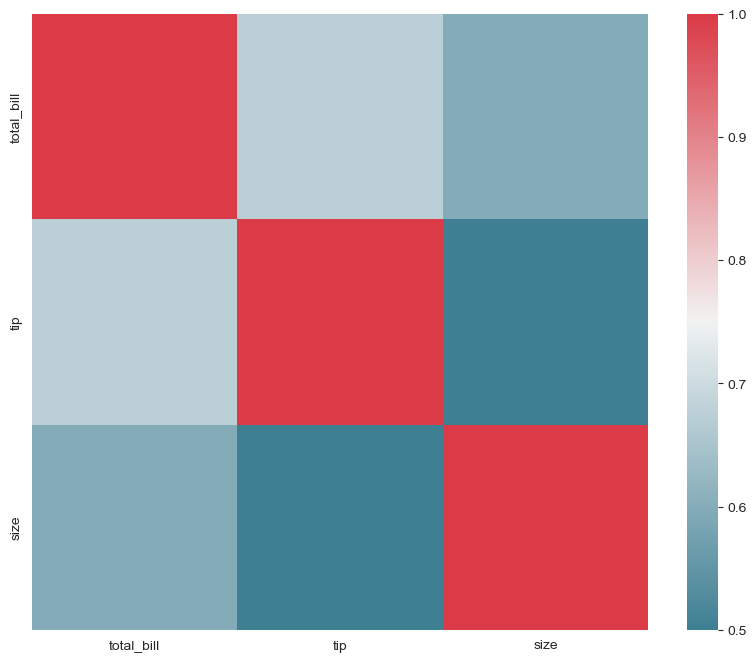

In [9]:
from matplotlib import pyplot as plt
import seaborn as sns

f, ax = plt.subplots(figsize=(10, 8))
corr = tips.corr(numeric_only=True)
sns.heatmap(corr,
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    vmin=0.5, vmax=1.0,
    square=True, ax=ax)

### Question 5: Write a Python function to compute the Pearson correlation coefficient between two arrays without using any built-in functions.

In [37]:
import math


# mean formula
def mean_private(array):
    sum = 0
    for i in array:
        sum += i
    return sum / len(array)

# covariance formula
def covariance_private(array1, array2):
    sum = 0
    if len(array1) != len(array2):
        return False
    mean1 = mean_private(array1)
    mean2 = mean_private(array2)
    for i in range(len(array1)):
        sum += (array1[i]- mean1) * (array2[i] - mean2)
    return sum / (len(array1) -1)
    
#std formula
def std_private(array):
    mean = mean_private(array)
    sum = 0
    for i in array:
        sum += math.pow(i - mean, 2)
    sum /= (len(array) -1)
    return math.sqrt(sum)

#pearson correlation formula
def pearson_corr_private(array1, array2):
    return covariance_private(array1, array2) / (std_private(array1) * std_private(array2))
    
x= [1,2,3,4,5]
y= [5,4,3,2,1]
    
print(pearson_corr_private(x,y))

-0.9999999999999998


### Question 6: Download the iris dataset from the sklearn library in Python. Compute the covariance and correlation matrices. Discuss any patterns you observe.

In [38]:
from sklearn.datasets import load_iris
import pandas as pd

# Load the iris dataset
data = load_iris()
iris = pd.DataFrame(data.data, columns=data.feature_names)

<Axes: >

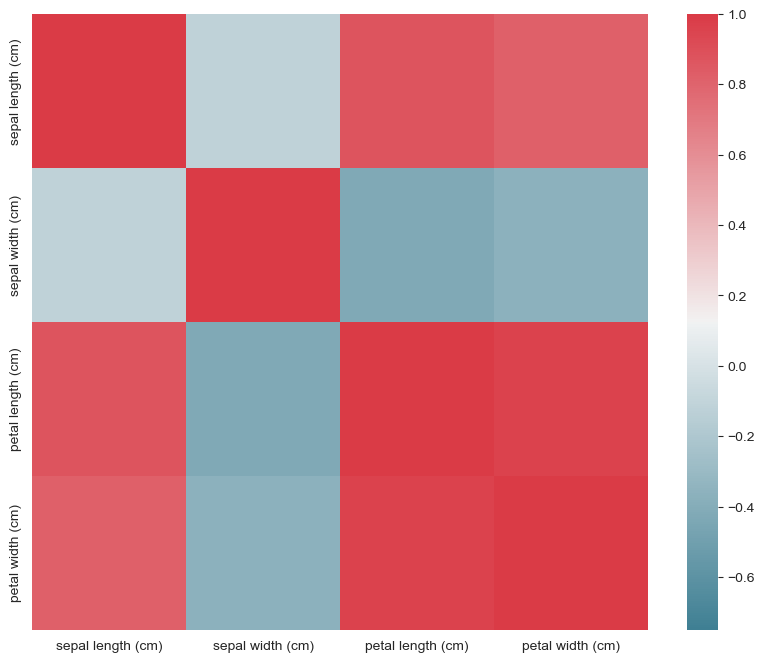

In [47]:
import seaborn as sns

f, ax = plt.subplots(figsize=(10, 8))
corr = iris.corr(numeric_only=True)
sns.heatmap(corr,
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    vmin=-0.75, vmax=1.0,
    square=True, ax=ax)

In [44]:
iris.corr(numeric_only=True).style.background_gradient(cmap='coolwarm')

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


In [45]:
iris.cov(numeric_only=True).style.background_gradient(cmap='coolwarm')

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),0.685694,-0.042434,1.274315,0.516271
sepal width (cm),-0.042434,0.189979,-0.329656,-0.121639
petal length (cm),1.274315,-0.329656,3.116278,1.295609
petal width (cm),0.516271,-0.121639,1.295609,0.581006


### Question 7: Write a Python program that reads a CSV file containing two columns of numerical data. The program should compute and print the covariance and correlation between the two columns.

### Question 8: Explain Simpson’s Paradox. Provide an example where computing the correlation on a combined dataset gives a different result than computing the correlations on separated groups

Simpson's paradox is phenomenon in statistics and probability in which a trend appears in several groups of data but disappears or reverses when the groups are combined.

For example lets say there from 1000 people each 800 like sinful strawberry and 750 like passionate peach. but if we look on men and women there is 900 men in the sinful strawberry and from them there is 760 that like it and there is 100 women and from them 40 women like it. and 700 in the passionate peach and from them 600 like it and there is 300 women and from them 150 like passionate peach.
so if we look on general more people like sinful strawberry then passionate peach. but if we look on men and women in separate more men and women prefer passionate peach then sinful strawberry.

### Question 9: Using the tips dataset, demonstrate Simpson’s Paradox by computing the correlation between total bill and tip for smokers and nonsmokers separately, and then for the combined dataset. Interpret your results.

In [18]:
none_smokers = tips[tips['smoker'] == 'No']
smokers = tips[tips['smoker'] == 'Yes']

<Axes: >

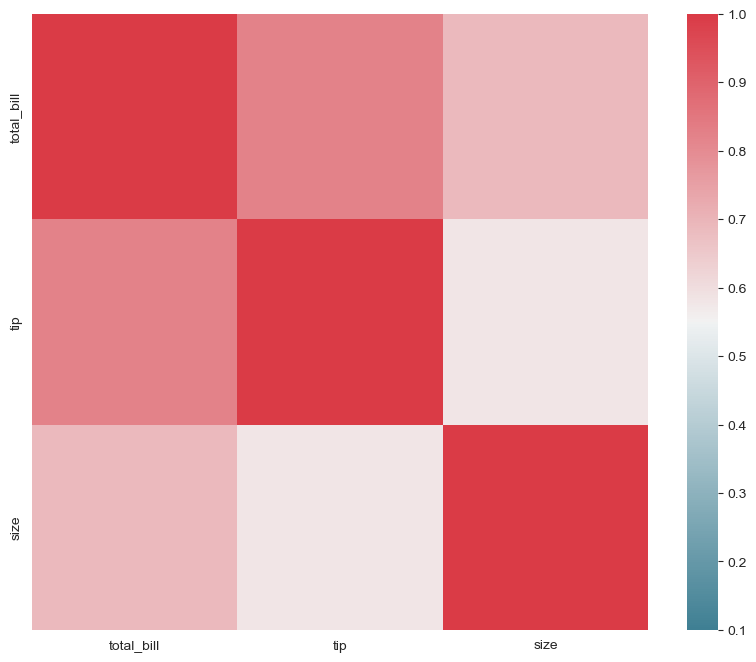

In [11]:
f, ax = plt.subplots(figsize=(10, 8))
corr = none_smokers.corr(numeric_only=True)
sns.heatmap(corr,
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    vmin=0.1, vmax=1.0,
    square=True, ax=ax)

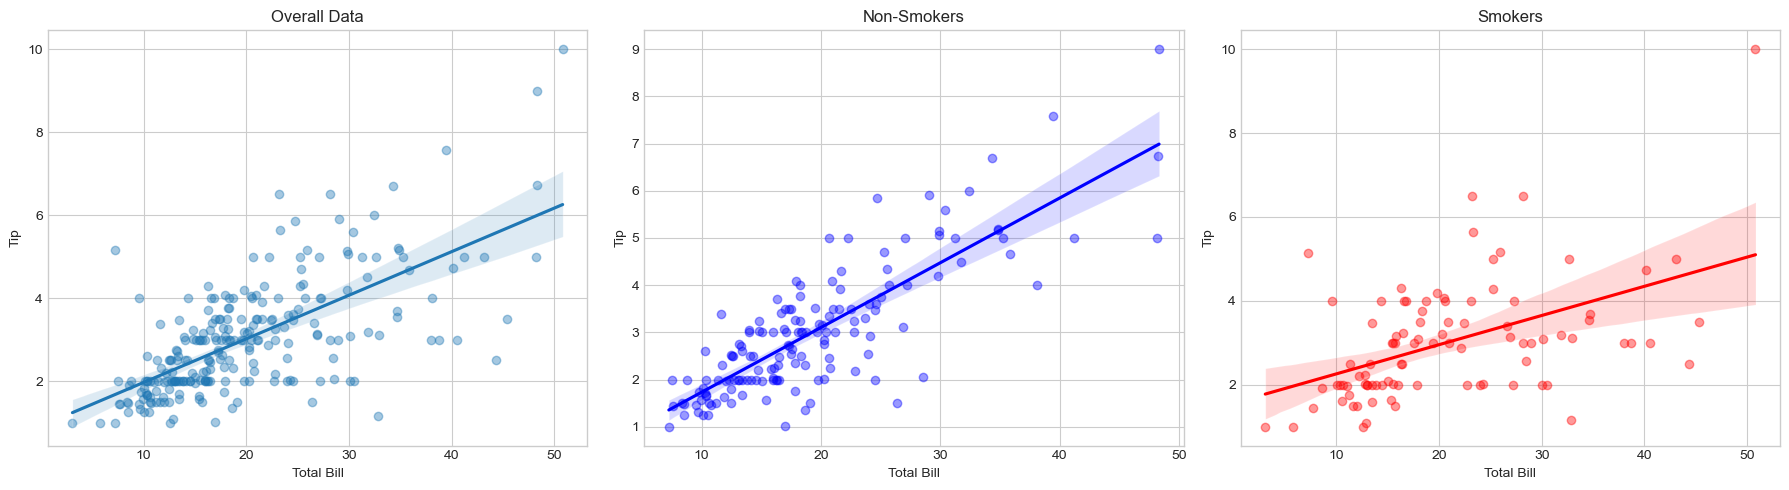

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load the tips dataset
tips = sns.load_dataset('tips')

# Create a figure with a 1x3 grid
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot overall data
sns.regplot(x='total_bill', y='tip', data=tips, ax=axes[0], scatter_kws={'alpha':0.4})
axes[0].set_title('Overall Data')
axes[0].set_xlabel('Total Bill')
axes[0].set_ylabel('Tip')

# Plot data for non-smokers
sns.regplot(x='total_bill', y='tip', data=tips[tips['smoker'] == 'No'], ax=axes[1], scatter_kws={'alpha':0.4}, color='blue')
axes[1].set_title('Non-Smokers')
axes[1].set_xlabel('Total Bill')
axes[1].set_ylabel('Tip')

# Plot data for smokers
sns.regplot(x='total_bill', y='tip', data=tips[tips['smoker'] == 'Yes'], ax=axes[2], scatter_kws={'alpha':0.4}, color='red')
axes[2].set_title('Smokers')
axes[2].set_xlabel('Total Bill')
axes[2].set_ylabel('Tip')

plt.tight_layout()
plt.show()


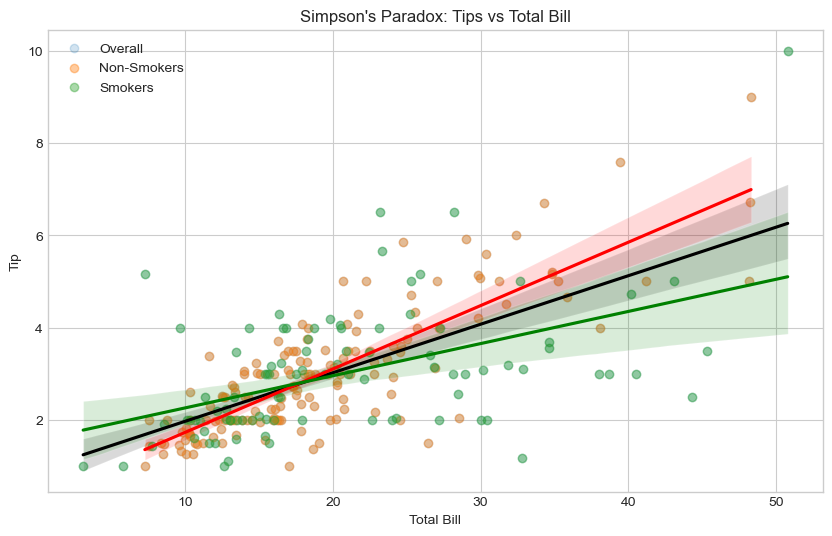

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load the tips dataset
tips = sns.load_dataset('tips')

# Create a scatter plot with regression lines for overall, smokers, and non-smokers
plt.figure(figsize=(10, 6))

# Overall regression line
sns.regplot(x='total_bill', y='tip', data=tips, scatter_kws={'alpha':0.2}, line_kws={'color': 'black'}, label='Overall')

# Regression line for non-smokers
sns.regplot(x='total_bill', y='tip', data=tips[tips['smoker'] == 'No'], scatter_kws={'alpha':0.4}, line_kws={'color': 'red'}, label='Non-Smokers')

# Regression line for smokers
sns.regplot(x='total_bill', y='tip', data=tips[tips['smoker'] == 'Yes'], scatter_kws={'alpha':0.4}, line_kws={'color': 'green'}, label='Smokers')

# Set labels and title
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.title('Simpson\'s Paradox: Tips vs Total Bill')
plt.legend()

plt.show()


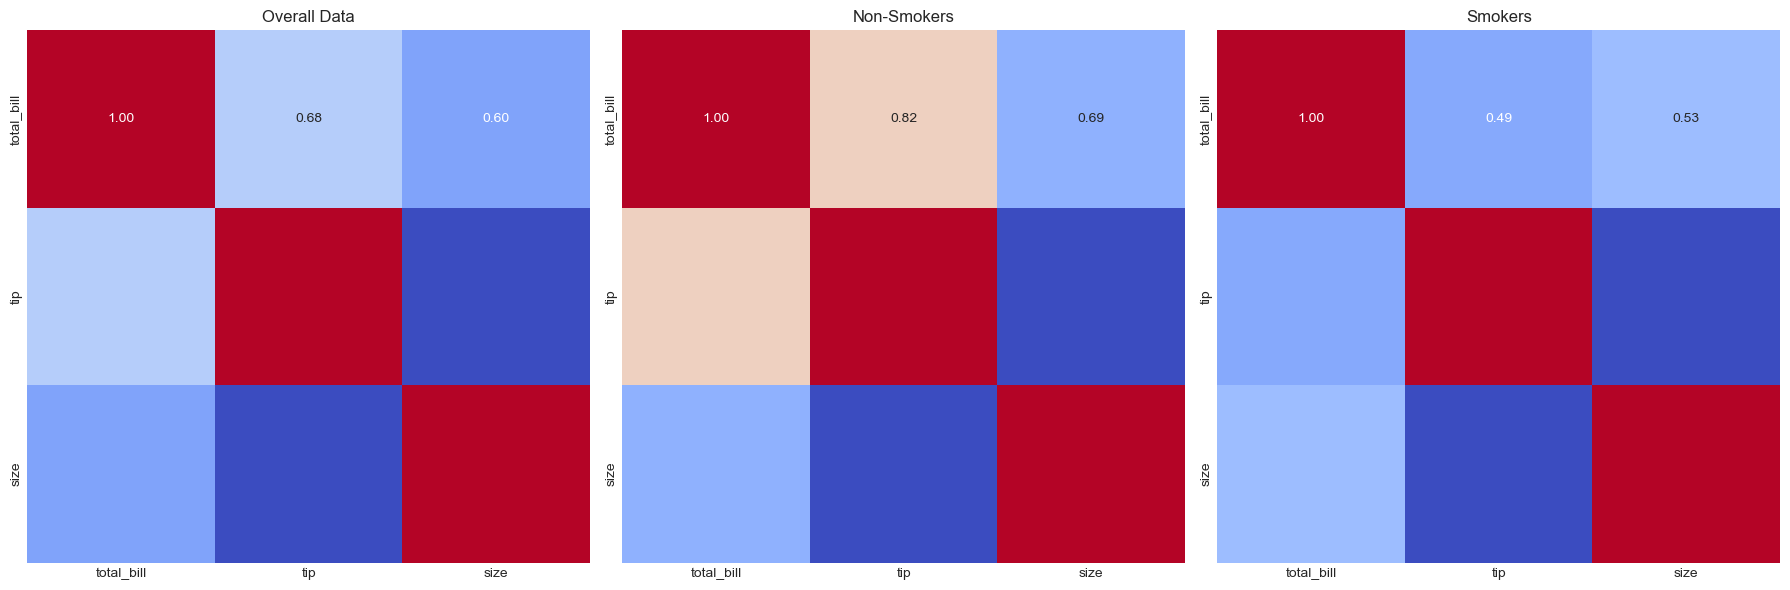

In [26]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Load the tips dataset
tips = sns.load_dataset('tips')

# Calculate the correlation matrices
corr_overall = tips.corr(numeric_only=True)
corr_nonsmokers = tips[tips['smoker'] == 'No'].corr(numeric_only=True)
corr_smokers = tips[tips['smoker'] == 'Yes'].corr(numeric_only=True)

# Create a function to plot styled correlation matrices
def plot_corr_matrix(corr, ax, title):
    sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', ax=ax, cbar=False)
    ax.set_title(title)

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot the correlation matrices
plot_corr_matrix(corr_overall, axes[0], 'Overall Data')
plot_corr_matrix(corr_nonsmokers, axes[1], 'Non-Smokers')
plot_corr_matrix(corr_smokers, axes[2], 'Smokers')

plt.tight_layout()
plt.show()


We can easily see that none smokers have higher correlation then smokers in total bill and tip.

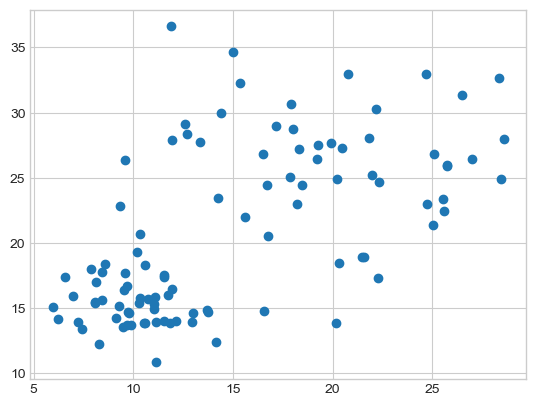

In [32]:
import numpy as np
# Example of creating a synthetic data set
data = {'group' : np.repeat(['A' , 'B' ] , 50),
        'x' : np.concatenate([np.random.normal(10, 2 ,50), np.random.normal(20 , 5 , 50)]),
        'y' : np.concatenate([np.random.normal(15 , 2 , 50 ), np.random.normal(25 , 5 , 50 )])
}
df = pd.DataFrame(data)

plt.scatter(df['x'], df['y'])
plt.show()

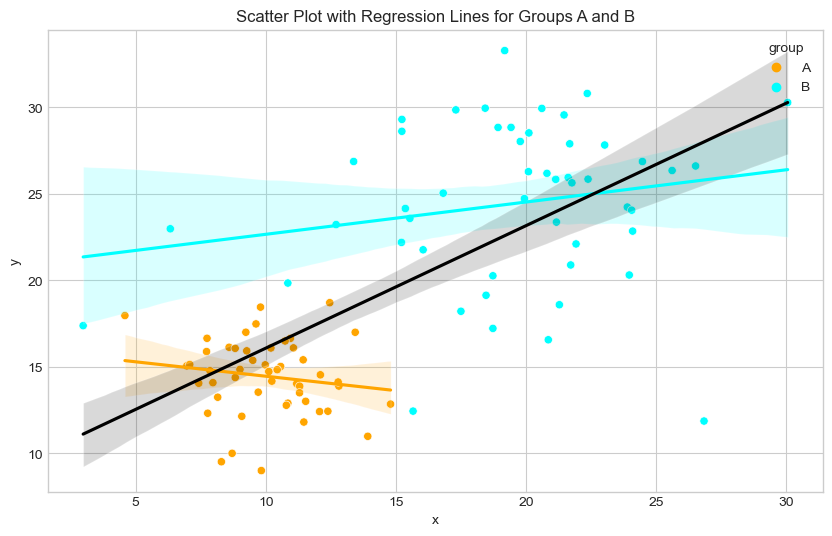

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Create synthetic data as described
data = {
    'group': np.repeat(['A', 'B'], 50),
    'x': np.concatenate([np.random.normal(10, 2, 50), np.random.normal(20, 5, 50)]),
    'y': np.concatenate([np.random.normal(15, 2, 50), np.random.normal(25, 5, 50)])
}
df = pd.DataFrame(data)

# Create a scatter plot
fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(x='x', y='y', hue='group', data=df, palette={'A': 'orange', 'B': 'cyan'}, ax=ax)

# Separate regression lines for group A and B
sns.regplot(x='x', y='y', data=df[df['group'] == 'A'], scatter=False, color='orange', ax=ax)
sns.regplot(x='x', y='y', data=df[df['group'] == 'B'], scatter=False, color='cyan', ax=ax)

# Overall correlation line
sns.regplot(x='x', y='y', data=df, scatter=False, color='black', ax=ax)

# Set title
ax.set_title('Scatter Plot with Regression Lines for Groups A and B')

# Display the plot
plt.show()
